In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

#Import data from src
current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import time_based_train_test_split

In [3]:
# Load the dataset
file_path = "../data/tickets_data.csv"
data = pd.read_csv(file_path)

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Describe:")
print(data.describe())

print("\nUnique Values per Column:")
print(data.nunique())


First 5 Rows of the Dataset:
                   Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  ...  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0  ...   
1  1070902.0              5  876925.0   True  9500000.0             0.0  ...   
2  7624237.0              3  916640.0  False  2000000.0             0.0  ...   
3  2867547.0              2       NaN  False    40000.0             0.0  ...   
4  7212559.0              3       NaN   True  1130000.0             0.0  ...   

  Domestic              VehicleType  VehicleClass TripRe

## Data Translation

Translate city names from Persian to English

In [4]:
#get all unique values in From & To columns together
unique_locations = pd.unique(data[['From', 'To']].values.ravel('K'))
print(f"\nTotal Unique Locations in 'From' and 'To' columns: {len(unique_locations)}")
print(unique_locations)



Total Unique Locations in 'From' and 'To' columns: 319
['گرگان' 'مشهد' 'شیراز' 'تبریز' 'تهران' 'بروجرد' 'اصفهان' 'یزد' 'رشت'
 'بوشهر' 'اهواز' 'اراک' 'مشهد (خراسان )' 'قم' 'سیرجان' 'کرج' 'آبادان'
 'زنجان' 'بافق' 'شوشتر' 'اردبیل' 'نجف آباد (اصفهان )' 'خرم آباد (لرستان )'
 'بهبهان' 'خرمشهر' 'رودسر' 'چالوس' 'جهرم' 'کیش' 'کرمان' 'قزوین'
 'گنبدکاووس' 'گلپایگان' 'بندرعباس' 'عسلويه' 'جلفا' 'دیر' 'ارومیه' 'زاهدان'
 'کرمانشاه' 'بابلسر' 'کاشمر' 'گرمسار' 'هشتگرد' 'اقلید' 'لنجان' 'همدان'
 'بیرجند' 'شهرکرد' 'مراغه' 'ساری' 'رامسر' 'بروجن' 'قایم شهر' 'جوین'
 'برخوار' 'سنندج' 'طبس' 'ماسال' 'شاهرود' 'سمنان' 'خواف' 'دامغان' 'دورود'
 'اندیمشک' 'شاهرود (سمنان )' 'تنکابن' 'آستارا' 'گناباد' 'لامرد'
 'کنگان (بوشهر)' 'نور' 'نایروبی' 'استانبول' 'چابهار' 'قشم' 'عسلویه'
 'شهرضا' 'ایرانشهر' 'بابل' 'مهاباد (آذربایجان غربی )' 'ملایر' 'زواره'
 'میلان' 'تاکستان' 'خوی' 'محمدیه' 'خرم دره' 'کاشان' 'گناوه' 'دزفول'
 'تویسرکان' 'خلخال' 'سرخس' 'مرند' 'نیشابور' 'بشرویه' 'ایذه' 'حکاری'
 'کازرون' 'ایلام' 'میانه' 'بانه' 'نوشهر'

In [5]:
# The Great City Translation Dictionary
city_map = {
    # --- Major Cities ---
    'تهران': 'Tehran',
    'مشهد': 'Mashhad',
    'مشهد (خراسان )': 'Mashhad',
    'شیراز': 'Shiraz',
    'اصفهان': 'Isfahan',
    'تبریز': 'Tabriz',
    'اهواز': 'Ahvaz',
    'کرج': 'Karaj',
    'قم': 'Qom',
    'کرمانشاه': 'Kermanshah',
    'ارومیه': 'Urmia',
    'رشت': 'Rasht',
    'زاهدان': 'Zahedan',
    'همدان': 'Hamedan',
    'کرمان': 'Kerman',
    'یزد': 'Yazd',
    'اردبیل': 'Ardabil',
    'بندرعباس': 'Bandar Abbas',
    'اراک': 'Arak',
    'قزوین': 'Qazvin',
    'زنجان': 'Zanjan',
    'گرگان': 'Gorgan',
    'ساری': 'Sari',
    'دزفول': 'Dezful',
    'آبادان': 'Abadan',
    'بوشهر': 'Bushehr',
    'بجنورد': 'Bojnurd',
    'خرم آباد (لرستان )': 'Khorramabad',
    'خرم\u200cآباد': 'Khorramabad', 
    'سنندج': 'Sanandaj',
    'ایلام': 'Ilam',
    'یاسوج': 'Yasuj',
    'یاسوج (بویراحمد)': 'Yasuj',
    'شهرکرد': 'Shahr-e Kord',
    'سمنان': 'Semnan',
    'بیرجند': 'Birjand',
    
    # --- Islands & Special Zones ---
    'کیش': 'Kish Island',
    'قشم': 'Qeshm Island',
    'عسلويه': 'Asaluyeh',
    'عسلویه': 'Asaluyeh',
    'چابهار': 'Chabahar',

    # --- International Cities ---
    'استانبول': 'Istanbul',
    'دبی': 'Dubai',
    'نجف': 'Najaf',
    'بغداد': 'Baghdad',
    'پاریس': 'Paris',
    'لندن': 'London',
    'فرانکفورت': 'Frankfurt',
    'میلان': 'Milan',
    'رم': 'Rome',
    'آمستردام': 'Amsterdam',
    'تورنتو': 'Toronto',
    'نیویورک': 'New York',
    'مسکو': 'Moscow',
    'دوحه': 'Doha',
    'آنتالیا': 'Antalya',
    'ازمیر': 'Izmir',
    'آنکارا': 'Ankara',
    'وان': 'Van',
    'دنیزلی': 'Denizli',
    'آدانا': 'Adana',
    'آلانیا': 'Alanya',
    'آغری': 'Agri',
    'حکاری': 'Hakkari',
    'تفلیس': 'Tbilisi',
    'باتومی': 'Batumi',
    'ایروان': 'Yerevan',
    'باکو': 'Baku',
    'کویت': 'Kuwait City',
    'مسقط': 'Muscat',
    'ابوظبی': 'Abu Dhabi',
    'شارجه': 'Sharjah',
    'سلیمانیه': 'Sulaymaniyah',
    'کربلا': 'Karbala',
    'بمبئی': 'Mumbai',
    'چنای': 'Chennai',
    'سیالکوت': 'Sialkot',
    'بانکوک': 'Bangkok',
    'پکن': 'Beijing',
    'توکیو': 'Tokyo',
    'استکهلم': 'Stockholm',
    'گوتنبرگ': 'Gothenburg',
    'کپنهاگ': 'Copenhagen',
    'زوریخ': 'Zurich',
    'هامبورگ': 'Hamburg',
    'ورشو': 'Warsaw',
    'لیسبون': 'Lisbon',
    'فارو': 'Faro',
    'ونیز': 'Venice',
    'فلورانس': 'Florence',
    'کاتانیا': 'Catania',
    'صوفیه': 'Sofia',
    'نایروبی': 'Nairobi',
    'دوربان': 'Durban',
    'مونترآل': 'Montreal',

    # --- Other Iranian Cities ---
    'بروجرد': 'Borujerd',
    'سیرجان': 'Sirjan',
    'بافق': 'Bafq',
    'شوشتر': 'Shushtar',
    'نجف آباد (اصفهان )': 'Najafabad',
    'بهبهان': 'Behbahan',
    'خرمشهر': 'Khorramshahr',
    'رودسر': 'Rudsar',
    'چالوس': 'Chalus',
    'جهرم': 'Jahrom',
    'گنبدکاووس': 'Gonbad-e Kavus',
    'گلپایگان': 'Golpayegan',
    'جلفا': 'Jolfa',
    'دیر': 'Dayyer',
    'بابلسر': 'Babolsar',
    'کاشمر': 'Kashmar',
    'گرمسار': 'Garmsar',
    'هشتگرد': 'Hashtgerd',
    'اقلید': 'Eqlid',
    'لنجان': 'Lenjan',
    'مراغه': 'Maragheh',
    'رامسر': 'Ramsar',
    'بروجن': 'Borujen',
    'قایم شهر': 'Qaem Shahr',
    'قائمشهر': 'Qaem Shahr',
    'جوین': 'Joveyn',
    'برخوار': 'Borkhar',
    'طبس': 'Tabas',
    'ماسال': 'Masal',
    'شاهرود': 'Shahrud',
    'شاهرود (سمنان )': 'Shahrud',
    'خواف': 'Khaf',
    'دامغان': 'Damghan',
    'دورود': 'Dorud',
    'اندیمشک': 'Andimeshk',
    'تنکابن': 'Tonekabon',
    'آستارا': 'Astara',
    'گناباد': 'Gonabad',
    'لامرد': 'Lamerd',
    'کنگان (بوشهر)': 'Kangan',
    'نور': 'Nur',
    'شهرضا': 'Shahreza',
    'ایرانشهر': 'Iranshahr',
    'بابل': 'Babol',
    'مهاباد (آذربایجان غربی )': 'Mahabad',
    'مهاباد': 'Mahabad',
    'ملایر': 'Malayer',
    'زواره': 'Zavareh',
    'تاکستان': 'Takestan',
    'خوی': 'Khoy',
    'محمدیه': 'Mohammadiyeh',
    'خرم دره': 'Khorramdarreh',
    'کاشان': 'Kashan',
    'گناوه': 'Genaveh',
    'تویسرکان': 'Tuyserkan',
    'خلخال': 'Khalkhal',
    'سرخس': 'Sarakhs',
    'مرند': 'Marand',
    'نیشابور': 'Neyshabur',
    'بشرویه': 'Boshruyeh',
    'ایذه': 'Izeh',
    'کازرون': 'Kazerun',
    'میانه': 'Mianeh',
    'بانه': 'Baneh',
    'نوشهر': 'Nowshahr',
    'شاهین شهر': 'Shahin Shahr',
    'آمل': 'Amol',
    'جاجرم': 'Jajarm',
    'فردوس (خراسان )': 'Ferdows',
    'بم': 'Bam',
    'داراب (فارس )': 'Darab',
    'دشتستان': 'Dashtestan',
    'ماهشهر': 'Mahshahr',
    'بوکان': 'Bukan',
    'ازنا': 'Azna',
    'شهریار': 'Shahriar',
    'بندرانزلی': 'Bandar Anzali',
    'سراب (آذربایجان شرقی )': 'Sarab',
    'خمینی شهر': 'Khomeyni Shahr',
    'سقز': 'Saqez',
    'بندر لنگه': 'Bandar Lengeh',
    'بندرلنگه': 'Bandar Lengeh',
    'بافت': 'Baft',
    'آباده': 'Abadeh',
    'شاهین دژ': 'Shahin Dezh',
    'اردکان (یزد)': 'Ardakan',
    'اردکان': 'Ardakan',
    'بهشهر': 'Behshahr',
    'مسجدسلیمان': 'Masjed Soleyman',
    'خراسانک': 'Khorasanak',
    'اسفراین': 'Esfarayen',
    'میبد': 'Meybod',
    'محمودآباد (مازندران )': 'Mahmudabad',
    'تربت حیدریه': 'Torbat-e Heydarieh',
    'قوچان': 'Quchan',
    'نهاوند (همدان )': 'Nahavand',
    'نی ریز': 'Neyriz',
    'زرند': 'Zarand',
    'زرند (کرمان )': 'Zarand',
    'ساوه': 'Saveh',
    'خمین': 'Khomein',
    'خنج': 'Khonj',
    'اسلام آباد غرب': 'Islamabad-e Gharb',
    'رفسنجان': 'Rafsanjan',
    'گچساران': 'Gachsaran',
    'گچساران (دوگنبدان )': 'Gachsaran',
    'ورامین': 'Varamin',
    'جیرفت': 'Jiroft',
    'سلماس': 'Salmas',
    'نقاب': 'Neqab',
    'آزادور': 'Azadvar',
    'شوش': 'Shush',
    'کهگیلویه (دهدشت )': 'Kohgiluyeh',
    'لارستان': 'Larestan',
    'میناب': 'Minab',
    'شهر قدس (قلعه حسن خان)': 'Shahr-e Qods',
    'رباط کریم': 'Robat Karim',
    'پارس آباد': 'Pars abad',
    'زابل': 'Zabol',
    'ماکو': 'Maku',
    'آستانه اشرفیه': 'Astaneh-ye Ashrafiyeh',
    'شبستر': 'Shabestar',
    'لنگرود': 'Langrud',
    'طوالش': 'Talesh',
    'دلفان': 'Delfan',
    'فیروزکوه': 'Firuzkuh',
    'سبزوار': 'Sabzevar',
    'سعادت شهر': 'Saadat Shahr',
    'قرچك': 'Qarchak',
    'پیشوا': 'Pishva',
    'شیروان (خراسان )': 'Shirvan',
    'پاوه': 'Paveh',
    'شهربابک (کرمان )': 'Shahr-e Babak',
    'اهر': 'Ahar',
    'نکا': 'Neka',
    'کوهدشت (لرستان )': 'Kuhdasht',
    'آبیک': 'Abyek',
    'مشگین شهر': 'Meshgin Shahr',
    'سنقر': 'Sonqor',
    'گراش': 'Gerash',
    'مریوان': 'Marivan',
    'بجستان': 'Bajestan',
    'ملکان (ملک کندی )': 'Malekan',
    'عجب شیر': 'Ajab Shir',
    'بادرود': 'Badrud',
    'برداسکن': 'Bardaskan',
    'ایوان': 'Eyvan',
    'جمکران': 'Jamkaran',
    'میاندوآب': 'Miandoab',
    'جاسک': 'Jask',
    'ارجان': 'Arjan',
    'صومعه سرا': 'Someh Sara',
    'عباس آباد(مازندران )': 'Abbasabad',
    'دشتی (بوشهر)': 'Dashti',
    'بهاباد': 'Behabad',
    'سپیددشت': 'Sepid Dasht',
    'اسلامشهر': 'Islamshahr',
    'لار (فارس )': 'Lar',
    'تفرش': 'Tafresh',
    'نایین': 'Nain',
    'لاهیجان (گیلان )': 'Lahijan',
    'مهران (ایلام )': 'Mehran',
    'خوانسار': 'Khansar',
    'گیلانغرب': 'Gilan-e Gharb',
    'سمیرم': 'Semirom',
    'محلات': 'Mahallat',
    'ابهر': 'Abhar',
    'قاینات (قاین )': 'Qaen',
    'دشت آزادگان': 'Dasht-e Azadegan',
    'قلعه گنج': 'Ghaleye Ganj',
    'جم': 'Jam',
    'شیرگاه': 'Shirgah',
    'کلاله': 'Kalaleh',
    'الیگودرز': 'Aligudarz',
    'پیرانشهر': 'Piranshahr',
    'ری': 'Rey',
    'نطنز': 'Natanz',
    'دهلران': 'Dehloran',
    'قروه': 'Qorveh',
    'ارسنجان': 'Arsanjan',
    'اردستان': 'Ardestan',
    'قصرشیرین': 'Qasr-e Shirin',
    'فومن': 'Fuman',
    'کنگاور (کرمانشاه )': 'Kangavar',
    'ابرکوه (ابرقو)': 'Abarkuh',
    'ممسنی': 'Mamasani',
    'پلدختر': 'Pol-e Dokhtar',
    'فسا': 'Fasa',
    'منوجان (کرمان )': 'Manujan',
    'پارسیان': 'Parsian',
    'بیجار': 'Bijar',
    'دیلم': 'Deylam',
    'گرمی': 'Germi',
    'نیک شهر': 'Nik Shahr',
    'دیواندره': 'Divandarreh',
    'دره شهر': 'Darreh Shahr',
    'تربت جام': 'Torbat-e Jam',
    'نقده': 'Naqadeh',
    'مهدی شهر': 'Mehdishahr',
    'خاش': 'Khash',
    'آشتیان': 'Ashtian',
    'امیدیه (خوزستان )': 'Omidiyeh',
    'پل سفید': 'Pol-e Sefid',
    'پاسارگاد': 'Pasargad',
    'آبدانان': 'Abdanan',
    'سرایان': 'Sarayan',
    'دلیجان': 'Delijan',
    'اسد آباد(همدان )': 'Asadabad',
    'مهر (فارس)': 'Mohr',
    'سردشت (آذربایجان غربی )': 'Sardasht',
    'کهنوج': 'Kahnuj',
    'قیروکارزین': 'QiroKarzin',
    'مهریز': 'Mehriz',
    'سلسله': 'Selseleh',
    'خرم بید': 'Khorrambid',
    'شوط': 'Showt',
    'استهبان': 'Estahban',
    'دهگلان': 'Dehgolan',
    'بناب (آذربایجان شرقی )': 'Bonab',
    'سراوان (سیستان و بلوچستان )': 'Saravan',
    'رامهرمز': 'Ramhormoz',
    'خور(اصفهان)': 'Khur',
    'بندر ترکمن': 'Bandar Torkaman',
    'رزن': 'Razan',
    'فریدونشهر': 'Fereydunshahr',
    'چالدران': 'Chaldoran',
    'جوانرود': 'Javanrud',
    'عنبرآباد': 'Anbarabad',
}

# Apply the mapping
data['From'] = data['From'].map(city_map).fillna(data['From'])
data['To'] = data['To'].map(city_map).fillna(data['To'])

# Check for anything missed
print("Missed Cities in From:", data[~data['From'].isin(city_map.values())]['From'].unique())
print("Missed Cities in To:", data[~data['To'].isin(city_map.values())]['To'].unique())


print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Missed Cities in From: []
Missed Cities in To: []

First 5 Rows of the Dataset:
                   Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  ...  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0  ...   
1  1070902.0              5  876925.0   True  9500000.0             0.0  ...   
2  7624237.0              3  916640.0  False  2000000.0             0.0  ...   
3  2867547.0              2       NaN  False    40000.0             0.0  ...   
4  7212559.0              3       NaN   True  1130000.0             0.0  ...   

  Dome

## Feature Engineering

### Checking Respected Feature Domains 

In [6]:
#Price
zero_price_count = (data['Price'] <= 0).sum()
print(f"Total tickets with Price <=0: {zero_price_count}")
print("\nCorresponding rows:\n", data[data['Price'] <= 0][['Price', 'CouponDiscount', 'Cancel']])

#dropping those values as they are outliers (all others have price equal or higher than 40000 rials)
data = data[data['Price'] > 0]
print("\nMaximum price:", data['Price'].max())
print("Minimum price:", data['Price'].min())

Total tickets with Price <=0: 2

Corresponding rows:
           Price  CouponDiscount  Cancel
6612 -1514000.0             0.0       1
8258        0.0             0.0       1

Maximum price: 383764590.0
Minimum price: 40000.0


### Missing Values

In [7]:
missing_info = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})

print(missing_info.sort_values(by='Missing Percentage', ascending=False))

                      Missing Count  Missing Percentage
HashPassportNumber_p         100153           99.146661
CancelTime                    85691           84.829976
UserID                        58474           57.886453
HashEmail                     57933           57.350888
VehicleClass                  38448           38.061674
VehicleType                    7544            7.468198
ReserveStatus                     0            0.000000
TicketID                          0            0.000000
BillID                            0            0.000000
DepartureTime                     0            0.000000
Created                           0            0.000000
CouponDiscount                    0            0.000000
Price                             0            0.000000
Male                              0            0.000000
Domestic                          0            0.000000
To                                0            0.000000
From                              0            0

Remove useless columns

In [8]:
#remove HashPassportNumber_p, UserID, HashEmail, BillID, BuyerMobile,TicketID, CancelTime columns
data = data.drop(columns=['HashPassportNumber_p', 'UserID', 'HashEmail', 'BillID', 'BuyerMobile', 'TicketID', 'CancelTime'])

print("\nFirst 5 Rows of the Dataset:")
data.head()



First 5 Rows of the Dataset:


,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,NationalCode
0,2022-10-23 09:38:49.110,2022-11-02 23:59:00,5,True,6600000.0,34425.0,Gorgan,Tehran,1,NaN,False,Work,Plane,0,477368495
1,2022-08-15 14:51:43.160,2022-08-18 04:15:00,5,True,9500000.0,0.0,Mashhad,Tehran,1,NaN,False,Int,Plane,0,15987669
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,3,False,2000000.0,0.0,Shiraz,Ahvaz,1,VIP 2+1,True,Work,Bus,0,667640412
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,2,False,40000.0,0.0,Tabriz,Jolfa,1,3 ستاره اتوبوسي,NaN,Int,Train,0,392476186
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,3,True,1130000.0,0.0,Tehran,Najafabad,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,79497837


Handling Missing Values

In [ ]:
# VehicleType: Small missing %,  drop those rows
data = data.dropna(subset=['VehicleType'])

# VehicleClass: Too many missing, so we label them 'Unknown'
data['VehicleClass'] = data['VehicleClass'].fillna('Unknown')

# Convert strings to datetime objects first
data['Created'] = pd.to_datetime(data['Created'])
data['DepartureTime'] = pd.to_datetime(data['DepartureTime'])

# Create "LeadTime" (How many days in advance did they book?)
data['LeadTime_Days'] = (data['DepartureTime'] - data['Created']).dt.total_seconds() / 86400

# Check if there is any strange value
inverse_time_count = (data['LeadTime_Days'] <= 0).sum()
print(f"Total tickets with negative LeadTime: {inverse_time_count}")

# #ALL THIS WILL BE DONE IN THE TRAIN/TEST SPLIT:
# # We want to know: "Is this user a high-risk person?"
# # We calculate the mean cancellation rate for each NationalCode
# user_stats = data.groupby('NationalCode')['Cancel'].agg(['mean', 'count']).reset_index()
# user_stats.columns = ['NationalCode', 'User_Cancel_Rate', 'User_Total_Tickets']

# # Merge this info back into the main dataset
# data = data.merge(user_stats, on='NationalCode', how='left')

# # NOW, we drop the NationalCode. The model will look at 'User_Cancel_Rate' instead.
# data = data.drop(columns=['NationalCode'])


data.head()

Total tickets with negative LeadTime: 0


,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,NationalCode,LeadTime_Days
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,3,False,2000000.0,0.0,Shiraz,Ahvaz,1,VIP 2+1,1,Work,Bus,0,667640412,0.732323
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,2,False,40000.0,0.0,Tabriz,Jolfa,1,3 ستاره اتوبوسي,2,Int,Train,0,392476186,0.872986
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,3,True,1130000.0,0.0,Tehran,Najafabad,1,اسکانیا تک صندلی ۳۱نفره,1,Int,Bus,0,79497837,1.478546
5,2022-02-07 10:56:25.550,2022-02-18 14:00:00,3,True,940000.0,60000.0,Borujerd,Tehran,1,VIP 25 نفره مانیتور دار,1,Work,Bus,0,366031823,11.127482
6,2022-07-03 14:39:23.203,2022-07-11 08:25:00,5,True,9289000.0,0.0,Tehran,Shiraz,1,فوکر 100,0,Work,Plane,0,122580697,7.740009


### Categorical Encoding
There are some features with 2 unique values, but have different types (string, bool). For consistency and easier future management, we turn them all in integers.
We also encode the `Vehicle` feature in integers.

In [ ]:
# binary encoding
data['Male'] = data['Male'].astype(int)
data['TripReason'] = data['TripReason'].map({'Work': 1, 'Int': 0})


In [ ]:
print("\nVehicle unique values:", data['Vehicle'].nunique())
unique_locations = pd.unique(data['Vehicle'])
print(unique_locations)


Vehicle Unique Values: 4
['Bus' 'Train' 'Plane' 'InternationalPlane']


In [ ]:
#categorical encoding
data['Vehicle'] = data['Vehicle'].map({'Bus': 0, 'Train': 1, 'Plane': 2, 'InternationalPlane': 3})

data['VehicleClass'] = data['VehicleClass'].map({False: 0, True: 1, 'Unknown': 2})
data['VehicleClass'] = data['VehicleClass'].astype(int)

### CouponDiscount -> PercentageDiscount

In [13]:
data['PercentageDiscount'] = data['CouponDiscount']/data['Price']
data = data.drop(columns=['CouponDiscount'])

### DepartureTime feature extraction

We look for a pattern in month, day of the week and day of the month of `DepartureTime`, to determine which information to retain.

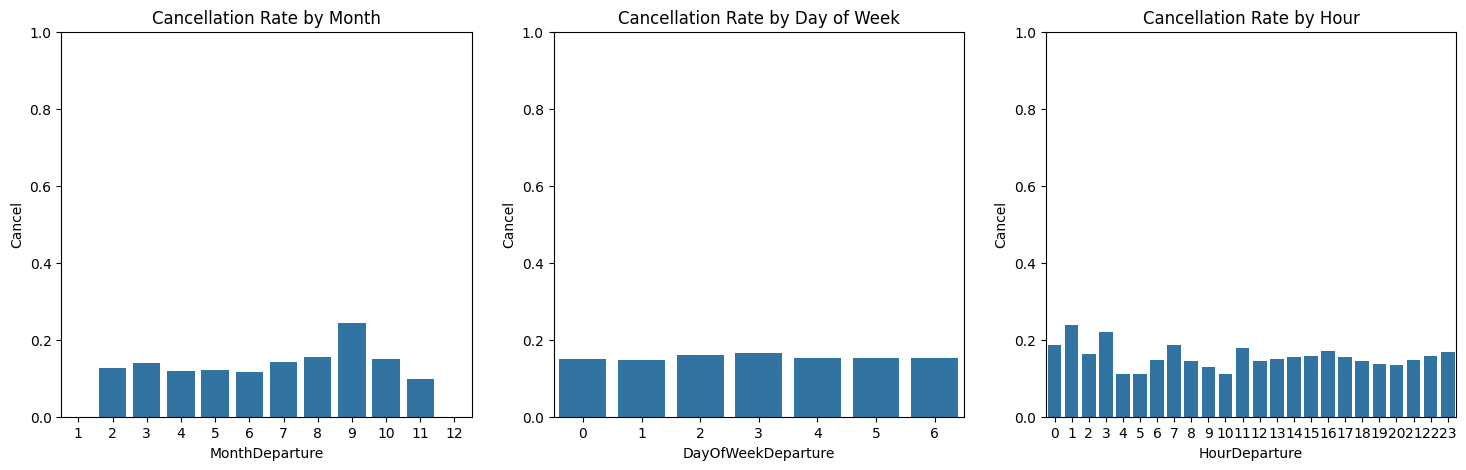

In [14]:
# Extract DepartureTime features
data['MonthDeparture'] = data['DepartureTime'].dt.month
data['DayOfWeekDeparture'] = data['DepartureTime'].dt.dayofweek
data['HourDeparture'] = data['DepartureTime'].dt.hour

# Plot Cancel Rate vs Feature
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Month
sns.barplot(x='MonthDeparture', y='Cancel', data=data, ax=axes[0], errorbar=None)
axes[0].set_title('Cancellation Rate by Month')
axes[0].set_ylim(0, 1) # Fix y-axis to see true scale

# Plot Day of Week
sns.barplot(x='DayOfWeekDeparture', y='Cancel', data=data, ax=axes[1], errorbar=None)
axes[1].set_title('Cancellation Rate by Day of Week')
axes[1].set_ylim(0, 1)

# Plot Hour
sns.barplot(x='HourDeparture', y='Cancel', data=data, ax=axes[2], errorbar=None)
axes[2].set_title('Cancellation Rate by Hour')
axes[2].set_ylim(0, 1)

plt.show()

Results:
- Month - keep: there is a spike in Month 9 (September), where the cancellation rate nearly doubles compared to Month 11
- DayOfWeek - drop: this plot is almost perfectly flat, this feature adds no value.
- Hour - keep: there is a visible pattern, night hours 0-3 (midnight to 3 AM) have higher cancellation rates compared to the safer hours of 5–10 AM.

In [15]:
# Drop the original column
data = data.drop(columns=['DepartureTime', 'DayOfWeekDeparture'])

# Final Dataset

In [16]:
#FINAL CHECK
print(data.isnull().sum())
print("\nRemaining Columns:", data.columns.tolist())

print("\nDataset Info:")
print(data.info())

Created                   0
ReserveStatus             0
Male                      0
Price                     0
From                      0
To                        0
Domestic                  0
VehicleType               0
VehicleClass          55023
TripReason                0
Vehicle                   0
Cancel                    0
NationalCode              0
LeadTime_Days             0
PercentageDiscount        0
MonthDeparture            0
HourDeparture             0
dtype: int64

Remaining Columns: ['Created', 'ReserveStatus', 'Male', 'Price', 'From', 'To', 'Domestic', 'VehicleType', 'VehicleClass', 'TripReason', 'Vehicle', 'Cancel', 'NationalCode', 'LeadTime_Days', 'PercentageDiscount', 'MonthDeparture', 'HourDeparture']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 93471 entries, 2 to 101016
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Created             93471 

In [17]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 93471 entries, 2 to 101016
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Created             93471 non-null  datetime64[ns]
 1   ReserveStatus       93471 non-null  int64         
 2   Male                93471 non-null  int64         
 3   Price               93471 non-null  float64       
 4   From                93471 non-null  object        
 5   To                  93471 non-null  object        
 6   Domestic            93471 non-null  int64         
 7   VehicleType         93471 non-null  object        
 8   VehicleClass        38448 non-null  float64       
 9   TripReason          93471 non-null  int64         
 10  Vehicle             93471 non-null  int64         
 11  Cancel              93471 non-null  int64         
 12  NationalCode        93471 non-null  int64         
 13  LeadTime_Days       93471 non-null  float64       

,Created,ReserveStatus,Male,Price,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,NationalCode,LeadTime_Days,PercentageDiscount,MonthDeparture,HourDeparture
2,2022-09-20 17:25:27.250,3,0,2000000.0,Shiraz,Ahvaz,1,VIP 2+1,NaN,1,0,0,667640412,0.732323,0.00000,9,11
3,2022-06-25 11:32:53.980,2,0,40000.0,Tabriz,Jolfa,1,3 ستاره اتوبوسي,2.0,0,1,0,392476186,0.872986,0.00000,6,8
4,2022-06-01 11:30:53.633,3,1,1130000.0,Tehran,Najafabad,1,اسکانیا تک صندلی ۳۱نفره,NaN,0,0,0,79497837,1.478546,0.00000,6,23
5,2022-02-07 10:56:25.550,3,1,940000.0,Borujerd,Tehran,1,VIP 25 نفره مانیتور دار,NaN,1,0,0,366031823,11.127482,0.06383,2,14
6,2022-07-03 14:39:23.203,5,1,9289000.0,Tehran,Shiraz,1,فوکر 100,NaN,1,2,0,122580697,7.740009,0.00000,7,8


In [18]:
train_df, test_df = time_based_train_test_split(data)
print(train_df.info())
train_df.head()

Sorting data by Created...
Split complete. Training: 74776 rows, Test: 18695 rows.
Global Training Cancel Rate: 0.1610
Found 12565 new users in Test set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74776 entries, 0 to 74775
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReserveStatus       74776 non-null  int64  
 1   Male                74776 non-null  int64  
 2   Price               74776 non-null  float64
 3   From                74776 non-null  object 
 4   To                  74776 non-null  object 
 5   Domestic            74776 non-null  int64  
 6   VehicleType         74776 non-null  object 
 7   VehicleClass        31391 non-null  float64
 8   TripReason          74776 non-null  int64  
 9   Vehicle             74776 non-null  int64  
 10  Cancel              74776 non-null  int64  
 11  LeadTime_Days       74776 non-null  float64
 12  PercentageDiscount  74776 non-null  float64
 13

,ReserveStatus,Male,Price,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,LeadTime_Days,PercentageDiscount,MonthDeparture,HourDeparture,User_Cancel_Rate,User_Total_Tickets
0,3,0,1000000.0,Shiraz,Yazd,1,VIPمانیتوردار-شارژر شخصی تخت شو-پذیرایی- هر ...,NaN,0,0,0,0.121696,0.0,1,23,0.0,1
1,3,1,1415000.0,Shiraz,Zahedan,1,اسکانیامارال کلاسیک تک صندلی (جدید)هر پنج سفر ...,NaN,1,0,0,0.759619,0.0,2,15,0.0,1
2,3,1,1415000.0,Shiraz,Zahedan,1,اسکانیامارال کلاسیک تک صندلی (جدید)هر پنج سفر ...,NaN,1,0,0,0.759619,0.0,2,15,0.0,1
3,3,1,1415000.0,Shiraz,Zahedan,1,اسکانیامارال کلاسیک تک صندلی (جدید)هر پنج سفر ...,NaN,1,0,0,0.759619,0.0,2,15,0.0,1
4,3,1,830000.0,Tehran,Rasht,1,25 نفره (VIP),NaN,1,0,0,0.109960,0.0,1,23,0.0,2


In [19]:
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18695 entries, 0 to 18694
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReserveStatus       18695 non-null  int64  
 1   Male                18695 non-null  int64  
 2   Price               18695 non-null  float64
 3   From                18695 non-null  object 
 4   To                  18695 non-null  object 
 5   Domestic            18695 non-null  int64  
 6   VehicleType         18695 non-null  object 
 7   VehicleClass        7057 non-null   float64
 8   TripReason          18695 non-null  int64  
 9   Vehicle             18695 non-null  int64  
 10  Cancel              18695 non-null  int64  
 11  LeadTime_Days       18695 non-null  float64
 12  PercentageDiscount  18695 non-null  float64
 13  MonthDeparture      18695 non-null  int32  
 14  HourDeparture       18695 non-null  int32  
 15  User_Cancel_Rate    18695 non-null  float64
 16  User

,ReserveStatus,Male,Price,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,LeadTime_Days,PercentageDiscount,MonthDeparture,HourDeparture,User_Cancel_Rate,User_Total_Tickets
0,3,0,1126400.0,Iranshahr,Kerman,1,اسکانیا ۲۵نفر*,NaN,1,0,0,1.303151,0.0,9,21,0.161001,0
1,3,0,1126400.0,Iranshahr,Kerman,1,اسکانیا ۲۵نفر*,NaN,1,0,0,1.303151,0.0,9,21,0.161001,0
2,3,1,2150000.0,Urmia,Tehran,1,MAN VIP 2+1 / سیستم تهویه مطبوع,NaN,1,0,0,0.295776,0.0,9,20,0.161001,0
3,3,1,1080000.0,Rasht,Tehran,1,وی ای پی ۲۵نفره,NaN,1,0,0,2.399631,0.0,10,23,0.161001,0
4,2,0,426500.0,Tehran,Semnan,1,4 ستاره اتوبوسي صبا,2.0,0,1,0,0.752125,0.0,9,8,0.000000,5


## Scatterplot

In [ ]:
cols_to_plot = ['ReserveStatus','Male','Price','Domestic','VehicleClass','TripReason','Vehicle','LeadTime_Days','PercentageDiscount','MonthDeparture','HourDeparture','User_Cancel_Rate']
# other vars: 'From','To','VehicleType',,'User_Total_Tickets'

# Create the plot
# hue='Cancel': Colors the points based on whether they canceled (0=Blue, 1=Orange)
# corner=True:  Removes the redundant upper-right triangle (cleaner look)
sns.pairplot(train_df[cols_to_plot + ['Cancel']], hue='Cancel', corner=True)

plt.show()

12

Orange = cancelled; Blue = non cancelled
1. `User_Cancel_Rate`. The diagonal plot confirms that past history is your best predictor. Most non-cancellers have a 0 rate. People who cancel often have a higher rate.The Scatterplots: Look at the row where User_Cancel_Rate is the Y-axis. You see vertical "stripes" of orange rising higher than the blue. This means as this rate goes up, the likelihood of being an "Orange" point (cancellation) increases drastically.
2. `ReserveStatus`. This shows some separation, lower statuses have very few Orange dots compared to others.
3. `Price` and `LeadTime_Days`. Look at the Price column: almost all the data is squished into the left corner, with a few dots stretching way far to the right. This means you have Outliers. Most tickets are cheap (under 5M), but you have a few massive outliers (maybe 100M+). These outliers squish your plot and can confuse linear models like Logistic Regression. You might want to log-transform Price or remove the top 1% of expensive tickets.
4. `HourDeparture` and `MonthDeparture`. Look at `HourDeparture` vs `LeadTime_Days`: you see a big, messy cloud of blue with orange sprinkled inside. Interpretation: There is no clear linear relationship here. Knowing the hour of departure doesn't immediately tell you if someone will cancel. The model will struggle to use these features individually, though they might work in combination with others.

The most obvious thing in this plot is the dominance of Blue: your model will be biased toward "Blue" (Not Cancel) unless you force it to pay attention to "Orange" using class_weight='balanced'.

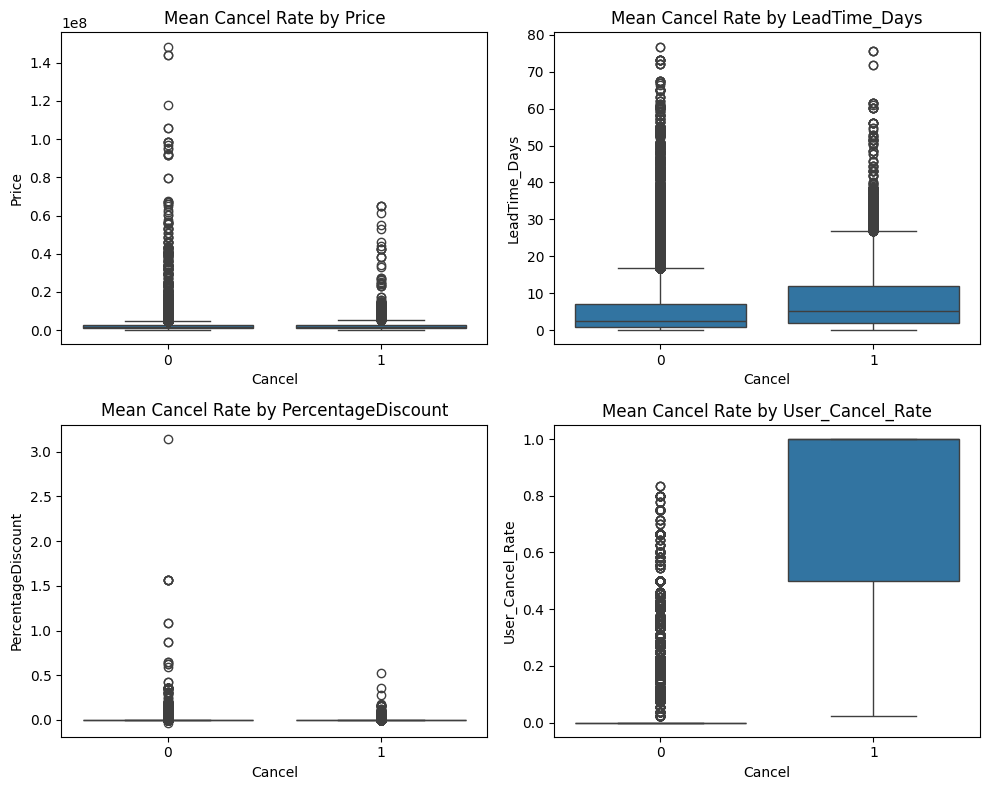

In [ ]:
cont_cols_to_plot = ['Price','LeadTime_Days','PercentageDiscount','User_Cancel_Rate']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array to make it easier to iterate over (converts 2D array to 1D)
axes = axes.flatten()

for i, col in enumerate(cont_cols_to_plot):
    sns.boxplot(x='Cancel', y=col, data=train_df, ax=axes[i])
    axes[i].set_title(f'Mean Cancel Rate by {col}')

plt.tight_layout()
plt.show()


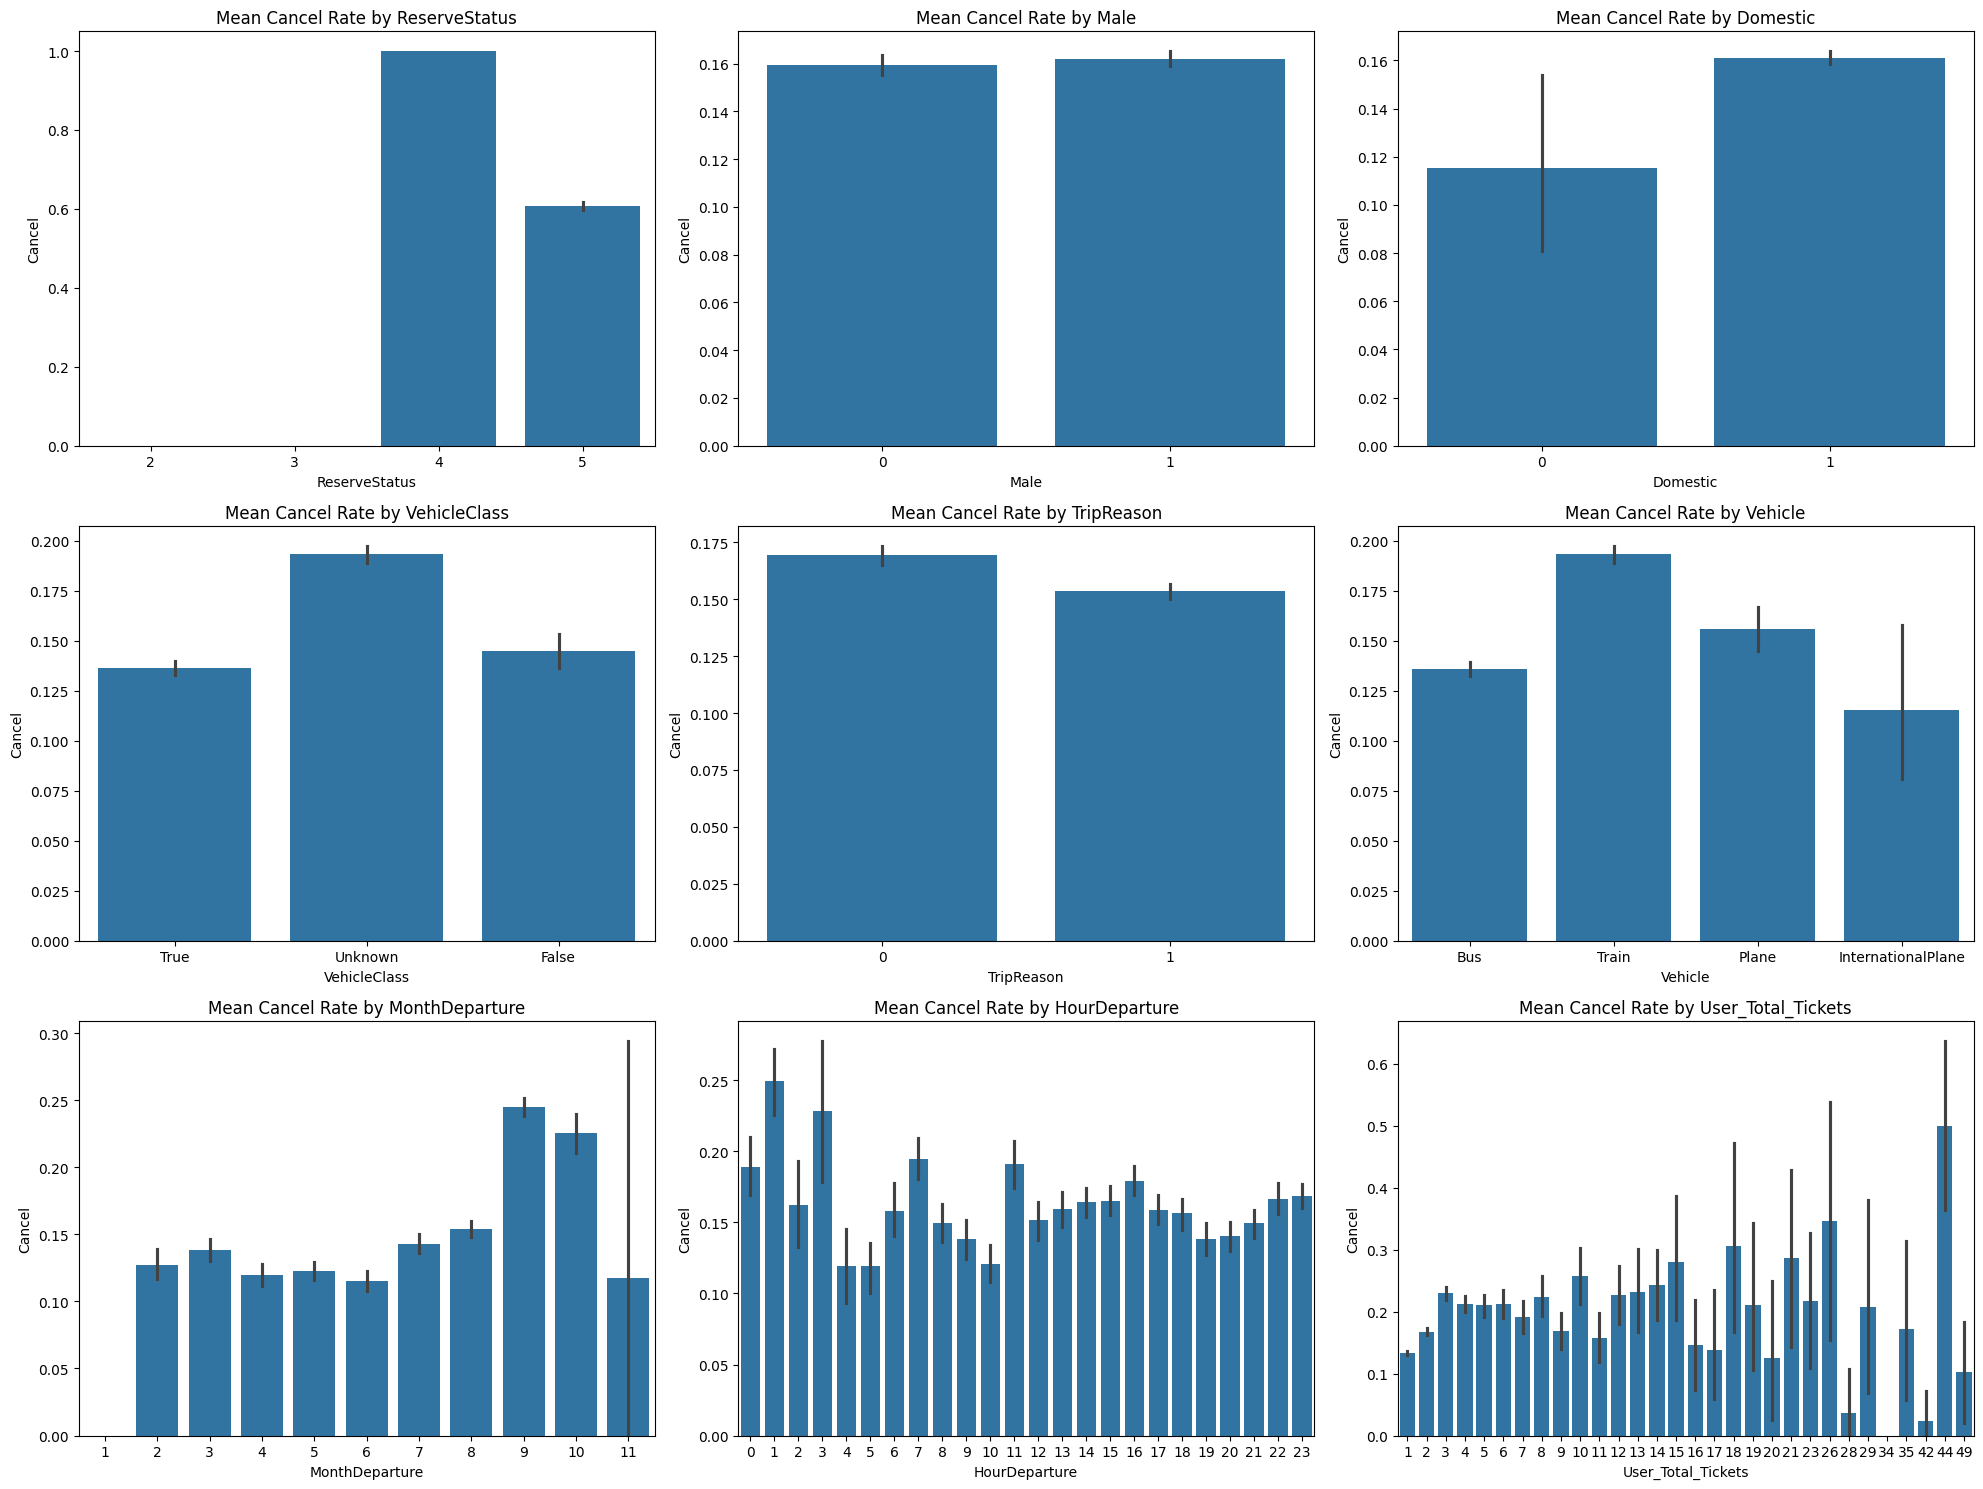

In [28]:
cat_cols_to_plot = ['ReserveStatus','Male','Domestic','VehicleClass','TripReason','Vehicle','MonthDeparture','HourDeparture','User_Total_Tickets']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes array to make it easier to iterate over (converts 2D array to 1D)
axes = axes.flatten()

for i, col in enumerate(cat_cols_to_plot):
    sns.barplot(x=col, y='Cancel', data=train_df, ax=axes[i])
    axes[i].set_title(f'Mean Cancel Rate by {col}')

plt.tight_layout()
plt.show()